# <center>**Projeto de Disciplina de Algoritmos de Classificação  [25E1_2]**</center>
# <center>**Aluna: Rachel Reuters**</center>

## PARTE 1- MODULO KAGGLE: Kaggle Intro to Machine Learning

In [3]:
import pandas as pd
# Download latest version
melbourne_data   =  pd.read_csv('melb_data.csv', sep=',', decimal='.')
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
melbourne_data = melbourne_data.dropna(axis=0)

y = melbourne_data.Price

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']


In [7]:
from sklearn.tree import DecisionTreeRegressor

X = melbourne_data[melbourne_features]


# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

predict_tree = melbourne_model.predict(X)


In [13]:
X['RealPrice'] = y 
X['Predict'] = predict_tree

c:\Users\belch\anaconda3\envs\tfd10\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\belch\anaconda3\envs\tfd10\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,RealPrice,Predict
1,2,1.0,156.0,-37.80790,144.99340,1035000.0,1035000.0
2,3,2.0,134.0,-37.80930,144.99440,1465000.0,1465000.0
4,4,1.0,120.0,-37.80720,144.99410,1600000.0,1600000.0
6,3,2.0,245.0,-37.80240,144.99930,1876000.0,1876000.0
7,2,1.0,256.0,-37.80600,144.99540,1636000.0,1636000.0
...,...,...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282,601000.0,601000.0
12206,3,1.0,179.0,-37.86558,144.90474,1050000.0,1050000.0
12207,1,1.0,0.0,-37.85588,144.89936,385000.0,385000.0
12209,2,1.0,0.0,-37.85581,144.99025,560000.0,560000.0


In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predict_tree)

1115.7467183128902

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 22)
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

1485.9832149774047


In [26]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=22)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
best_mae= 999999
for max_leaf_nodes in [5, 50, 500, 5000,20000]:
    current_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    if current_mae <best_mae :
        best_mae = current_mae
        best_leaf_node  = max_leaf_nodes

print(f"Best leaf = {best_leaf_node}")
model = DecisionTreeRegressor(max_leaf_nodes=best_leaf_node, random_state=22)
model.fit(X, y)
preds_val = model.predict(val_X)


mae_final = mean_absolute_error(val_y, preds_val)
print(mae_final)

Best leaf = 5000
0.0


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=22)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

1564.0011555842486


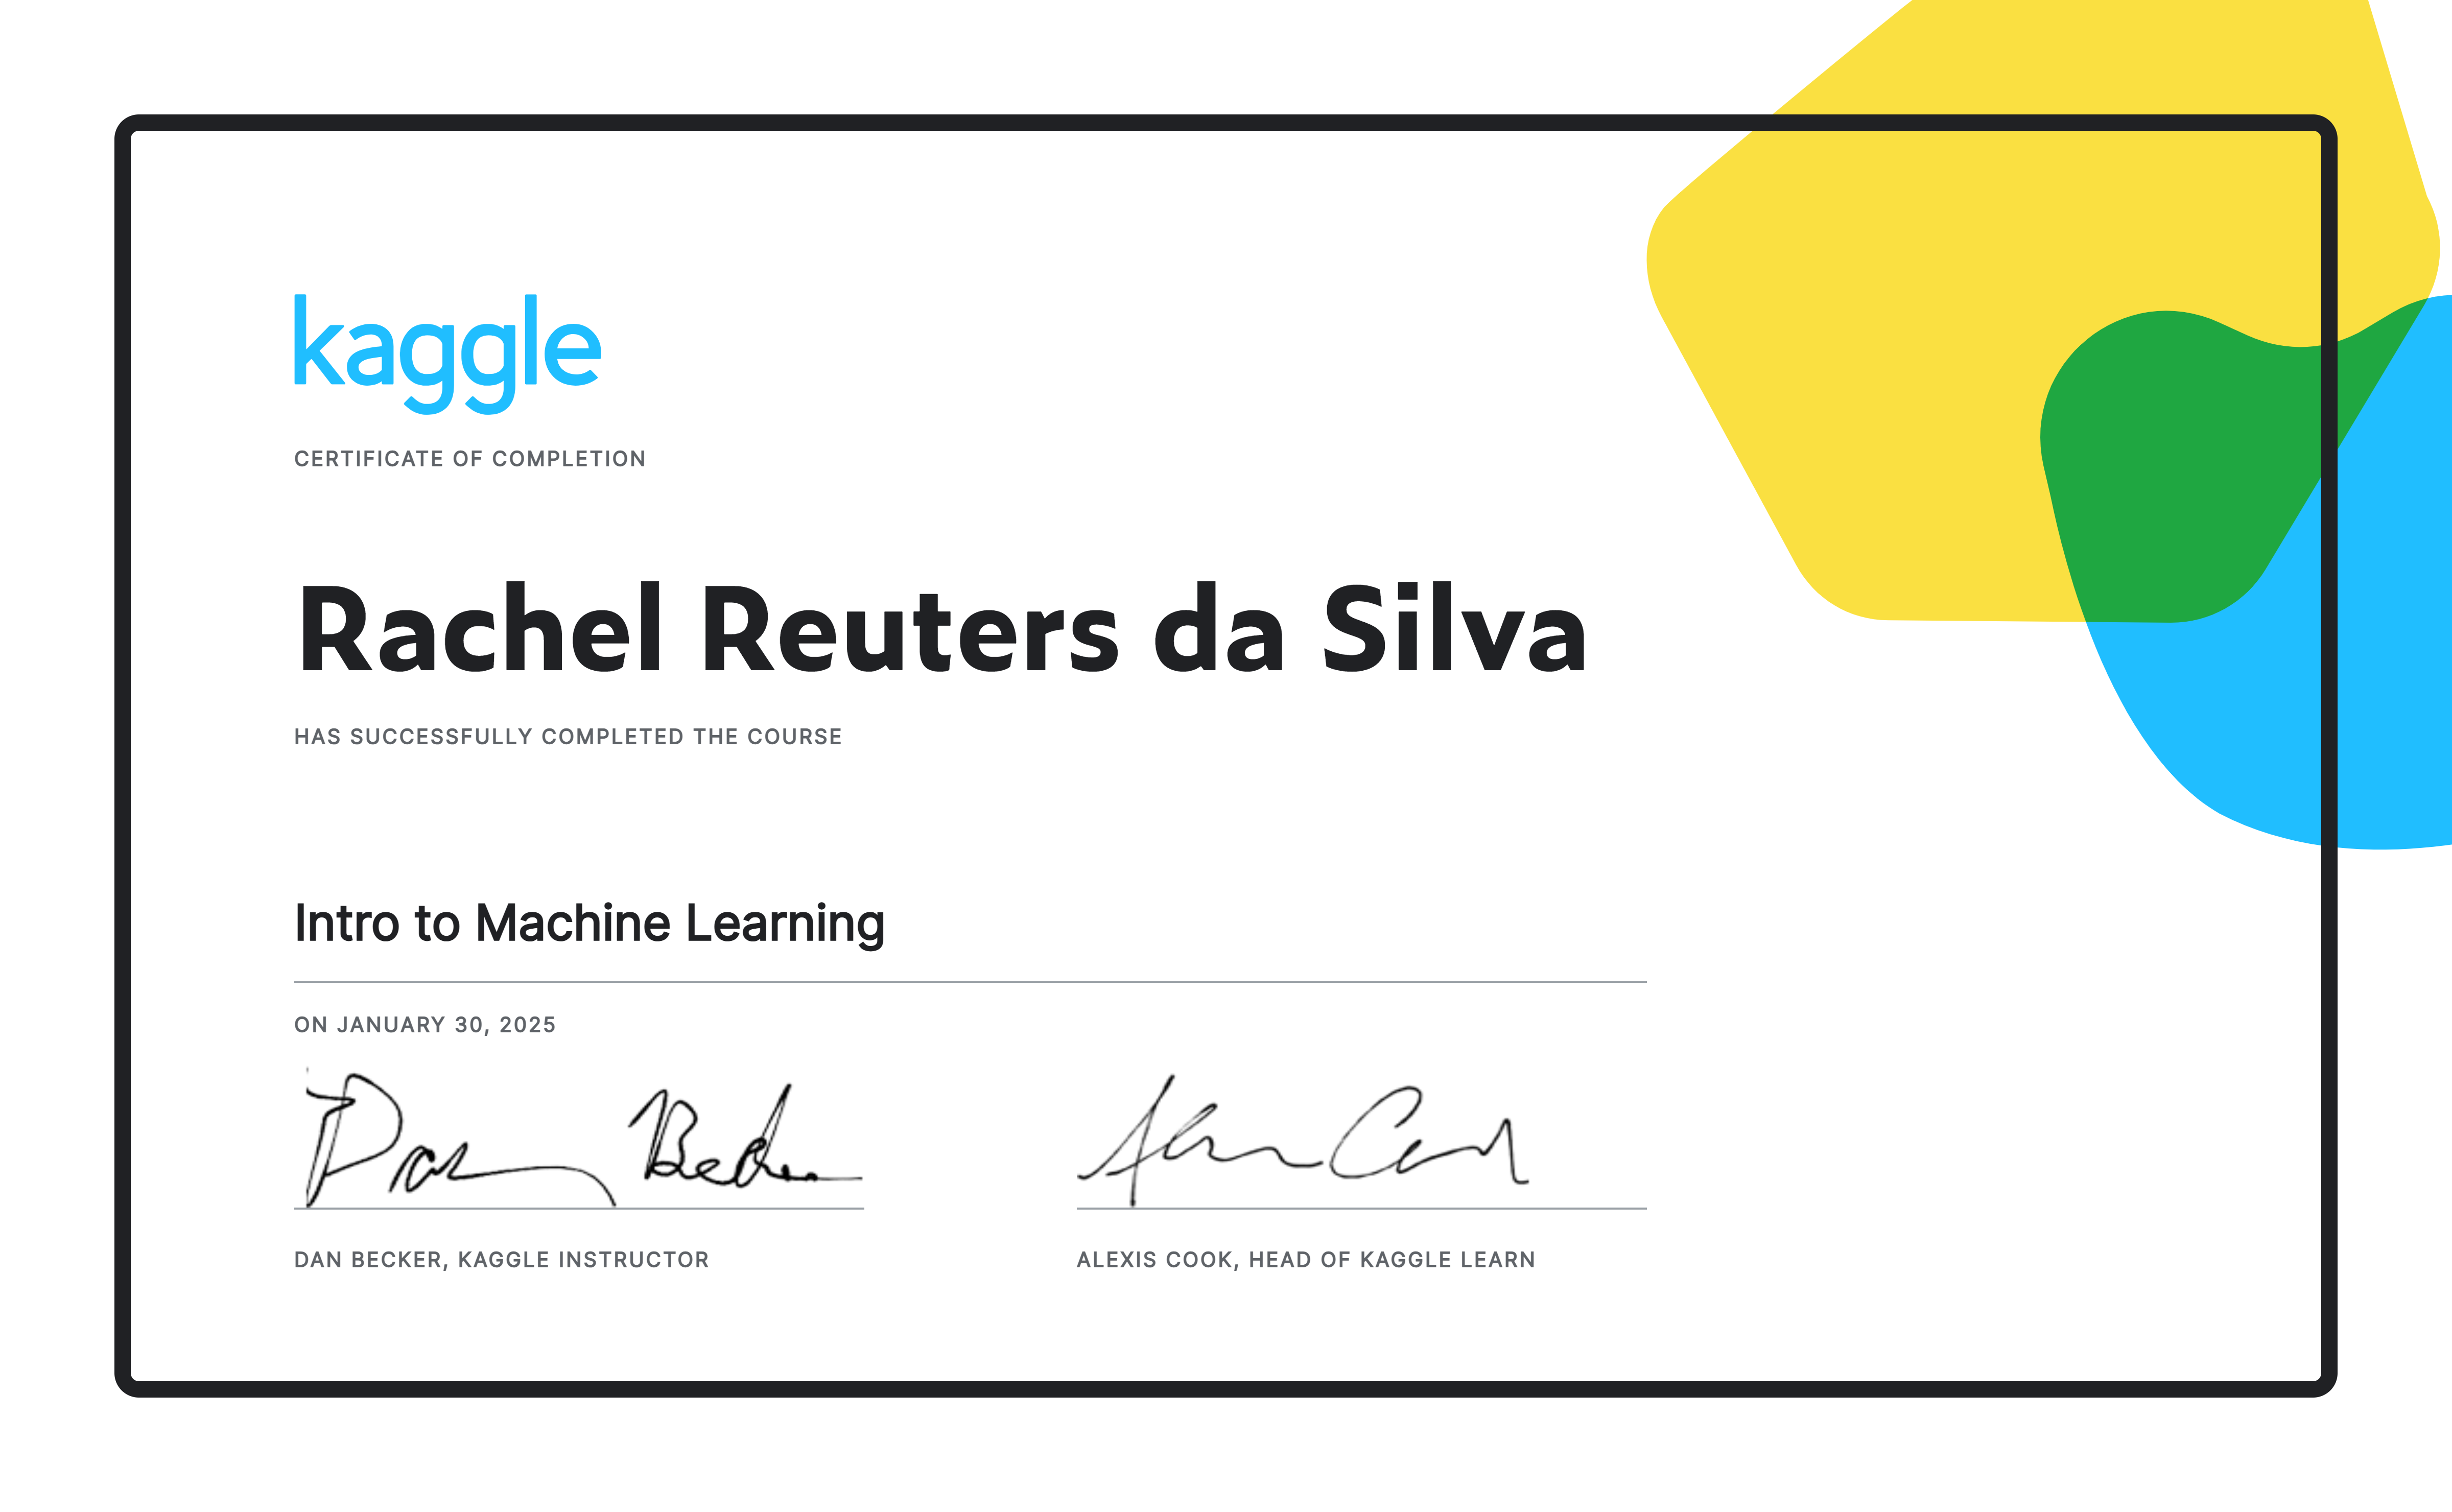

## PARTE 2 - BASE DE DADOS

## PARTE 3 - PRE-PROCESSAMENTO E ANÁLISE DOS DADOS

## PARTE 4 - TREINAMENTO E CLASSIFICAÇÃO

## PARTE 5 - COMPARAÇÃO DOS MODELOS

## PARTE 6 - ESCOLHA DO MODELO

## PARTE 7 - LINK PARA GITHUB